<a href="https://colab.research.google.com/github/diyoraiword/air-price-prediction/blob/main/tree_model_development_for_air_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import OrdinalEncoder, PolynomialFeatures

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
data = pd.read_csv('/content/train_data.csv (3) (1) (1).zip')
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
encoder = OrdinalEncoder()
text = data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]
data[['airline', 'flight','source_city','departure_time','stops','arrival_time','destination_city','class']]=encoder.fit_transform(text)
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
drop = ['id', 'price']
x = data.drop(drop, axis=1)
y = data['price']

x = x.sample(100)
y = y.sample(100)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=2)

print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (60, 10)
x_test = (40, 10)
y_train = (60,)
y_test = (40,)


In [ ]:
model = DecisionTreeRegressor()

model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
train_yhat = model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
com_pre = pd.DataFrame({'prediction':train_yhat, 'real':y_train})
com_pre.head()

,prediction,real
6236,6993.0,6993
17211,4165.0,4165
1845,44280.0,44280
9318,7530.0,7530
6816,9000.0,9000


In [ ]:
test_yhat = model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 28472.55680914519


Feature engineering 

In [ ]:
data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712


In [ ]:
data['waiting_time'] = (data['days_left'] * 24 - data['duration'])

data.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,waiting_time
0,1,5.0,1214.0,0.0,1.0,0.0,5.0,5.0,1.0,14.25,21,7212,489.75
1,2,4.0,1126.0,3.0,2.0,2.0,5.0,4.0,1.0,1.75,7,5292,166.25
2,3,5.0,1245.0,0.0,4.0,0.0,2.0,2.0,0.0,9.58,5,60553,110.42
3,4,5.0,1191.0,4.0,4.0,0.0,2.0,3.0,1.0,6.75,28,5760,665.25
4,5,3.0,275.0,1.0,1.0,2.0,4.0,5.0,1.0,2.00,4,10712,94.00


splitting data in three categories train, cross validation and test

In [ ]:
drop_col = ['id', 'price']

x = data.drop(drop_col, axis=1)
y = data[['price']]

x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)


print(f'x_train = {x_train.shape}')
print(f'x_test = {x_test.shape}')
print(f'x_cv = {x_cv.shape}')
print(f'y_cv = {y_cv.shape}')
print(f'y_train = {y_train.shape}')
print(f'y_test = {y_test.shape}')

x_train = (12000, 11)
x_test = (4000, 11)
x_cv = (4000, 11)
y_cv = (4000, 1)
y_train = (12000, 1)
y_test = (4000, 1)


In [ ]:
min_samples_split_list = [ 2, 4, 10, 20, 50, 100, 150, 300, 500, 800]

train_error = []
cv_error = []

for min_split in min_samples_split_list:
  model = DecisionTreeRegressor(min_samples_split=min_split, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))


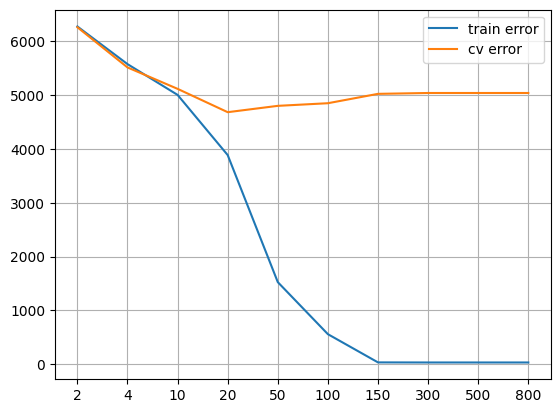

In [ ]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.legend(['train error', 'cv error'])
plt.grid()
plt.show()

as you notice, min_samples_split = 20 is the best choice

In [ ]:
max_depth_list = [2, 4, 6, 10, 16, 20, 30, 40, 50, 80]

train_error = []
cv_error = []

for max_depth in max_depth_list:
  model = DecisionTreeRegressor(max_depth=max_depth, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

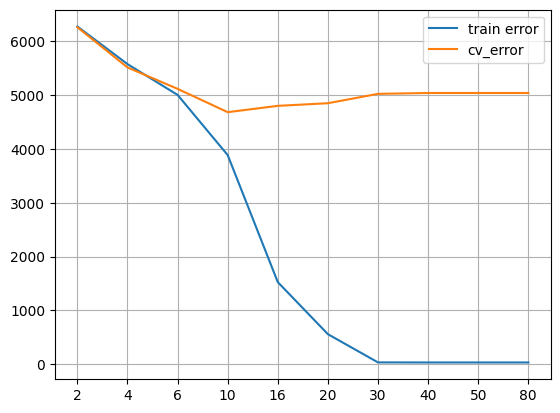

In [ ]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

here, max_depth = 10 gives perfect result

In [ ]:
de_tree_model = DecisionTreeRegressor(min_samples_split=20,
                                            max_depth = 10,
                                            random_state = 1)
de_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=1)

In [ ]:
train_yhat = de_tree_model.predict(x_train)
tr_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(tr_mse)}')

train error 4060.9791654253854


In [ ]:
cv_yhat = de_tree_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'cv error {np.sqrt(cv_mse)}')

cv error 4627.122922201228


In [ ]:
test_yhat = de_tree_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 4512.689316873702


Random Forest model

In [ ]:
min_samples_split_list = [ 2, 4, 10, 20, 50, 100]

train_error = []
cv_error = []

for min_split in min_samples_split_list:
  model = RandomForestRegressor(min_samples_split=min_split, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))


<ipython-input-49-b80919cd6df4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-49-b80919cd6df4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-49-b80919cd6df4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-49-b80919cd6df4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-49-b80919cd6df4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

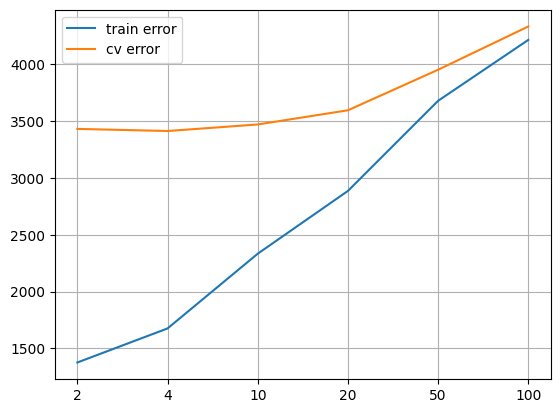

In [ ]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.legend(['train error', 'cv error'])
plt.grid()
plt.show()

In [ ]:
max_depth_list = [2, 4, 6, 10, 16, 20, 30, 40, 50, 80]

train_error = []
cv_error = []

for max_depth in max_depth_list:
  model = RandomForestRegressor(max_depth=max_depth, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

<ipython-input-53-b5555492323e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-53-b5555492323e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-53-b5555492323e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-53-b5555492323e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-53-b5555492323e>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

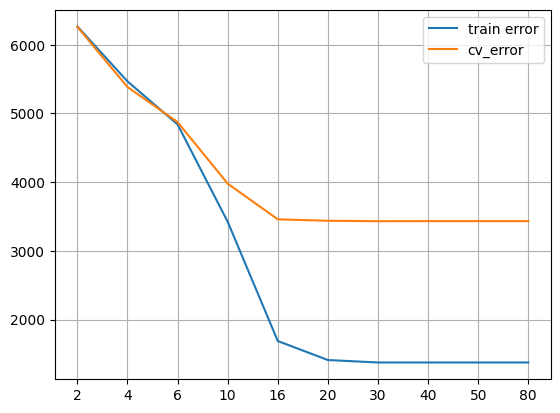

In [ ]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

In [ ]:
n_estimators_list = [10,50,100,500, 1000, 1500]
train_error = []
cv_error = []

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators = n_estimators, random_state=1)
  model.fit(x_train, y_train)

  tr_yhat = model.predict(x_train)
  tr_mse = mean_squared_error(y_train, tr_yhat)
  train_error.append(np.sqrt(tr_mse))

  cv_yhat = model.predict(x_cv)
  cv_mse = mean_squared_error(y_cv, cv_yhat)
  cv_error.append(np.sqrt(cv_mse))

<ipython-input-57-d188b5d8e068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-57-d188b5d8e068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-57-d188b5d8e068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-57-d188b5d8e068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)
<ipython-input-57-d188b5d8e068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

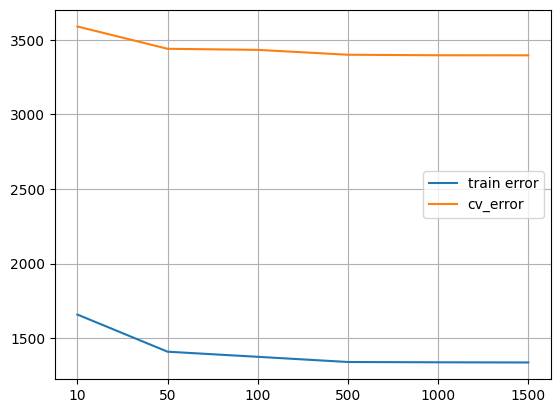

In [ ]:
plt.plot(train_error)
plt.plot(cv_error)
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.legend(['train error', 'cv_error'])
plt.grid()
plt.show()

In [ ]:
random_model = RandomForestRegressor(min_samples_split = 4,
                                     max_depth = 20,
                                     n_estimators = 500,
                                     random_state=1)
random_model.fit(x_train, y_train)

<ipython-input-59-66c9d5f1cda1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_model.fit(x_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=4, n_estimators=500,
                      random_state=1)

In [ ]:
train_yhat = random_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 1668.0400591936138


In [ ]:
cv_yhat = random_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'cv error {np.sqrt(cv_mse)}')

cv error 3386.9571443721065


In [ ]:
test_yhat = random_model.predict(x_test)
test_mse = mean_squared_error(y_test, test_yhat)
print(f'test error {np.sqrt(test_mse)}')

test error 3473.5221797377


XGBRegressor

In [ ]:
xgb_model = XGBRegressor(n_estimatos = 500,
                         learnin_rate=0.1,
                         verbosity = 1,
                         random_state=1)
xgb_model.fit(x_train, y_train)

[18:13:13] WARNING: ../src/learner.cc:767: 
Parameters: { "learnin_rate", "n_estimatos" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learnin_rate=0.1, learning_rate=None,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_estimatos=500, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
train_yhat = xgb_model.predict(x_train)
train_mse = mean_squared_error(y_train, train_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 2306.85383634176


In [ ]:
cv_yhat = xgb_model.predict(x_cv)
cv_mse = mean_squared_error(y_cv, cv_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 2306.85383634176


In [ ]:
test_yhat = xgb_model.predict(x_test)
train_mse = mean_squared_error(y_test, test_yhat)
print(f'train error {np.sqrt(train_mse)}')

train error 3651.417872605943


applying scaling and polynomial feature

In [ ]:
train_err = []
cv_err = []

for i in range(1, 3):
  poly = PolynomialFeatures(degree=i, include_bias=False)
  x_train_mapped = poly.fit_transform(x_train)

  model = RandomForestRegressor(min_samples_split = 4,
                                max_depth = 20,
                                n_estimators = 500,
                                random_state=1)
  model.fit(x_train_mapped, y_train)

  train_yhat = model.predict(x_train_mapped)
  train_mse = np.sqrt(mean_squared_error(y_train, train_yhat))
  train_err.append(train_mse)

  x_cv_mapped = poly.fit_transform(x_cv)

  cv_yhat = model.predict(x_cv_mapped)
  cv_mse = np.sqrt(mean_squared_error(y_cv, cv_yhat))
  cv_err.append(cv_mse)


<ipython-input-73-ad72a876e743>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_mapped, y_train)
<ipython-input-73-ad72a876e743>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train_mapped, y_train)


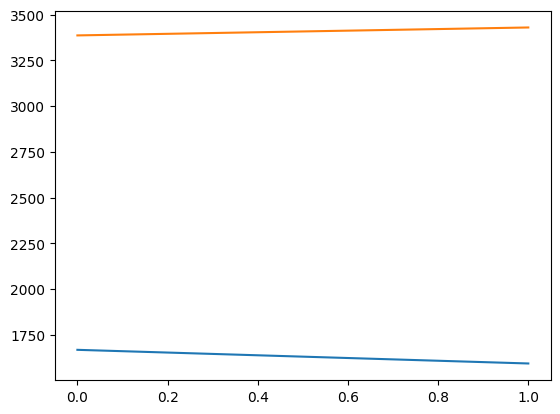

In [ ]:
plt.plot(train_err)
plt.plot(cv_err)
plt.show()

In [ ]:
print(train_err)
print(cv_err)

[1668.0400591936138, 1593.3993852367919]
[3386.9571443721065, 3430.321047759336]


polynomial feature is not beneficial to imporve the model